# Planning the swedish economy 

Let's begin importing the data in a dictionary for the periods we want to plan. The data has been saved from the excel files using the ``save_data.py`` script.

In [1]:
from sys import path
from os.path import join, abspath
from pickle import load

# Tell python to search for the files and modules starting from the working directory
module_path = abspath(join('..', '..'))
if module_path not in path:
    path.append(module_path)

with open(join('data', 'swedish_economy.pkl'), 'rb') as f:
    economy = load(f)

with open(join('data', 'swedish_product_names.pkl'), 'rb') as f:
    product_names = load(f)

The products and production units are the same since the data is aggregated (except there is a CO2 product but not a CO2 sector):

In [2]:
print(product_names.head())
product_names.tail()

0    Products of agriculture, hunting and related s...
1    Products of forestry, logging and related serv...
2    Fish and other fishing products; aquaculture p...
3                                 Mining and quarrying
4        Food products, beverages and tobacco products
dtype: object


55       Services furnished by membership organisations
56    Repair services of computers and personal and ...
57                              Other personal services
58    Services of households as employers; undiffere...
59                                                  CO2
dtype: object

## The plan

We will plan the economy for 15 periods with a horizon of 5 periods and revising the plan after 3 periods (apply these 3 periods and discard the other 2).

In [3]:
from economicplanning import OptimizePlan
from numpy import zeros, ones

plan_periods = 15
horizon_periods = 5
revise_periods = 3

plan = OptimizePlan(plan_periods = plan_periods,
                    horizon_periods = horizon_periods, 
                    revise_periods = revise_periods,
                    econ = economy)

num_products = economy['prices_export'][0].size
init_excess_prod = economy['final_domestic'][0] / 12
init_export_deficit = 0

plan(init_excess_prod, init_export_deficit)


## Visualizing the results

In [4]:
import matplotlib.pyplot as plt
from numpy import linspace

plt.style.use('seaborn-v0_8-whitegrid')

colors = plt.cm.nipy_spectral(linspace(0, 1, num_products))

We planned for 9 years and the interpolation between them (mYEAR).

In [5]:
periods = ['2008', 'm2008', '2009', 'm2009', '2010', 'm2010',
           '2011', 'm2011', '2012', 'm2012', '2013', 'm2013',
           '2014', 'm2014', '2015', 'm2015', '2016', 'm2016']

### Production unit activity 

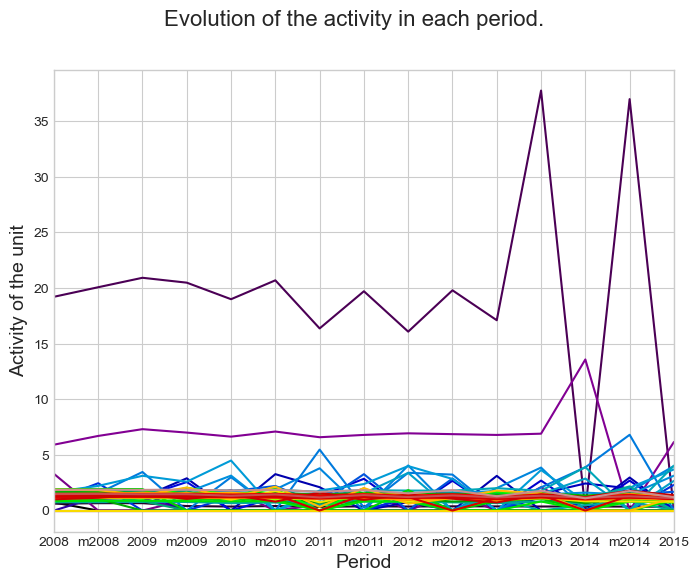

In [6]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of the activity in each period.', size = 16)

for i in range(plan.num_units):
    ax.plot(periods[: plan.plan_periods], plan.planned_activity[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Activity of the unit', size = 14)

plt.savefig(join('figures', 'unit_activity.png'))

### Production

Note that a period with negative production means that more product was used than supplied.

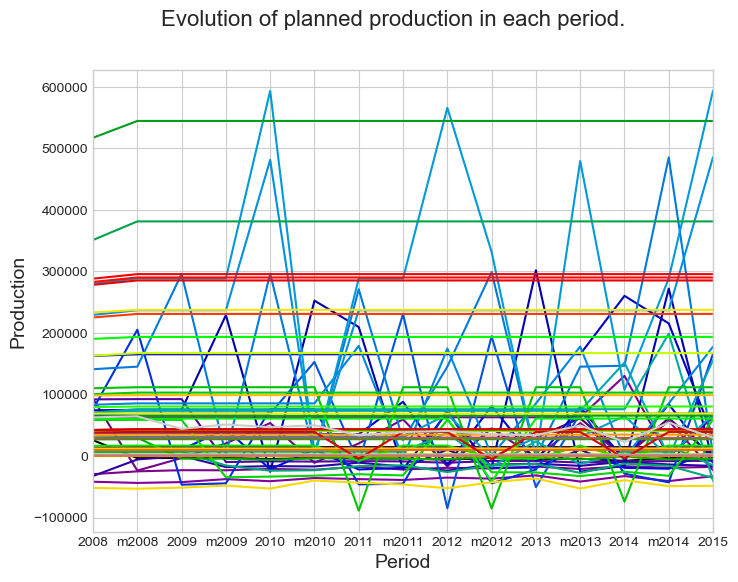

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of planned production in each period.', size = 16)

for i in range(num_products):
    ax.plot(periods[: plan.plan_periods], plan.planned_production[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Production', size = 14)

plt.savefig(join('figures', 'planned_prod.png'))

### Excess production

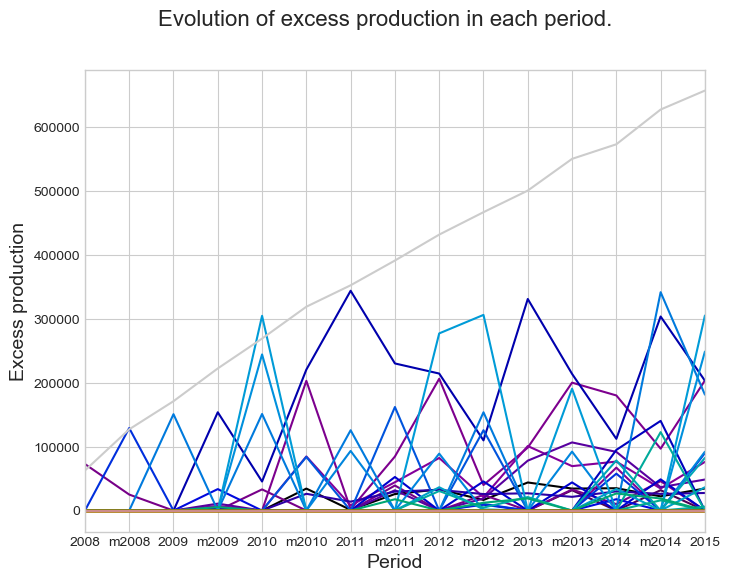

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of excess production in each period.', size = 16)

for i in range(num_products):
    ax.plot(periods[: plan.plan_periods], plan.planned_surplus[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Excess production', size = 14)

plt.savefig(join('figures', 'excess_prod.png'))

Note how carbon dioxide keeps rising since it is not used.

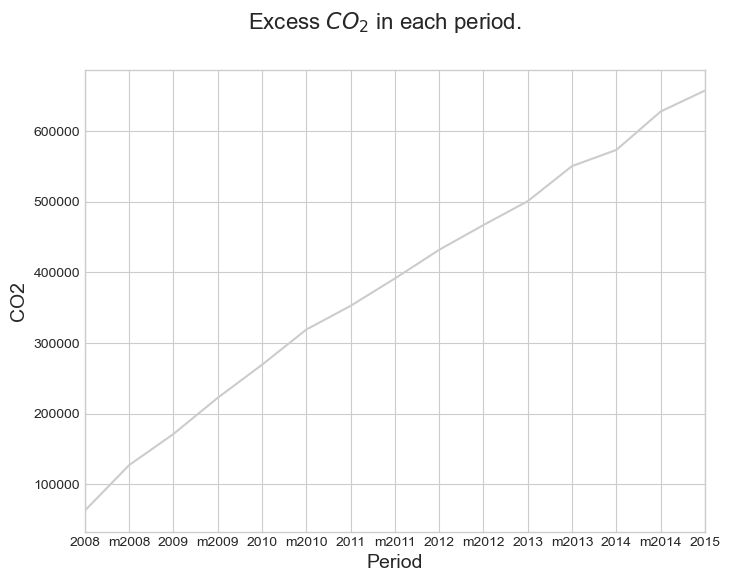

In [9]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle(r'Excess $CO_2$ in each period.', size = 16)

ax.plot(periods[: plan.plan_periods], plan.planned_surplus[59, :], c=colors[59, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel(product_names[59], size = 14)

plt.savefig(join('figures', 'excess_co2.png'))

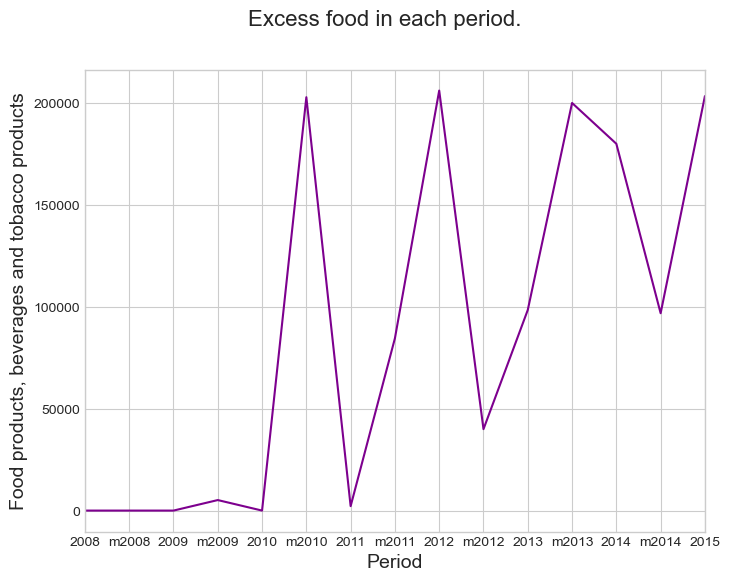

In [10]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Excess food in each period.', size = 16)

ax.plot(periods[: plan.plan_periods], plan.planned_surplus[4, :], c=colors[4, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel(product_names[4], size = 14)

plt.savefig(join('figures', 'excess_food.png'))

### Imported final goods

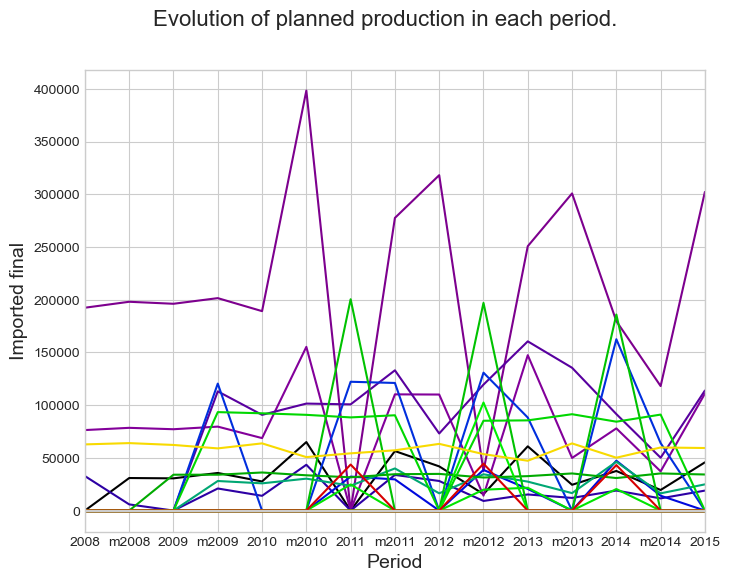

In [11]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Evolution of imported final goods in each period.', size = 16)

for i in range(num_products):
    ax.plot(periods[: plan.plan_periods], plan.planned_final_import[i, :], c=colors[i, :])

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Imported final', size = 14)

plt.savefig(join('figures', 'planned_prod.png'))

### Export deficit

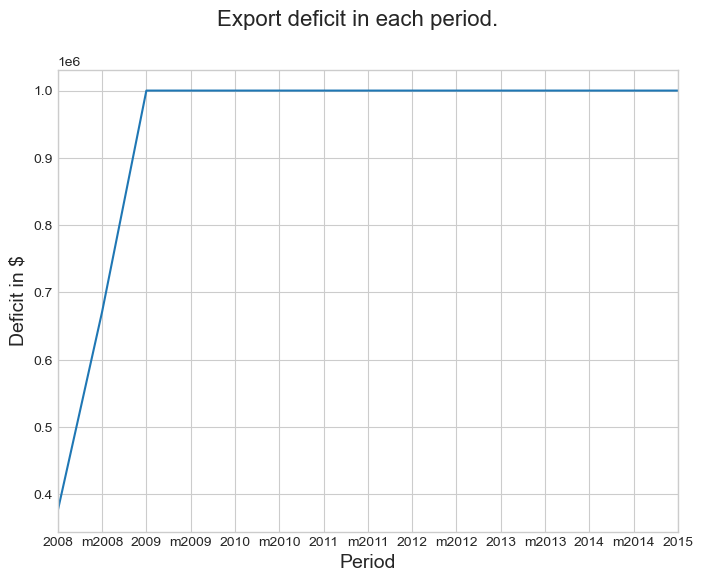

In [12]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Export deficit in each period.', size = 16)

ax.plot(periods[: plan.plan_periods], plan.export_deficit)

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Deficit in $', size = 14)

plt.savefig(join('figures', 'export_deficit.png'))

### Total worked hours

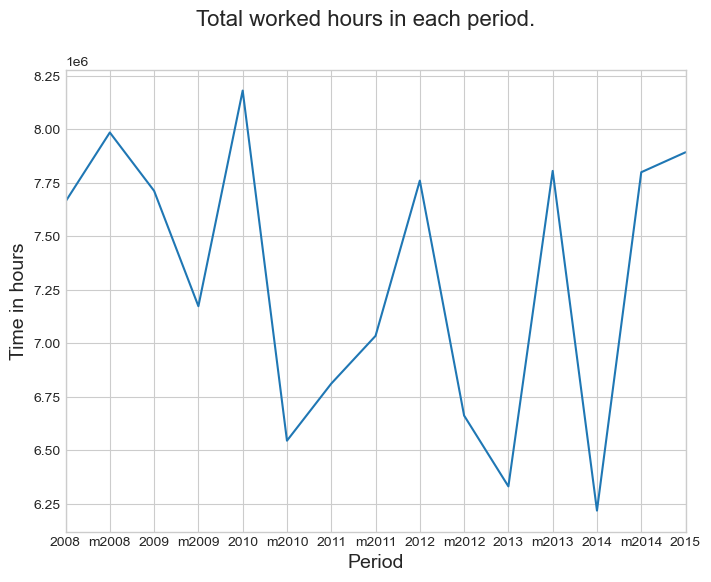

In [13]:
fig, ax = plt.subplots(1,1, figsize = (8, 6))
fig.suptitle('Total worked hours in each period.', size = 16)

ax.plot(periods[: plan.plan_periods], plan.worked_hours)

plan_lims = ax.set_xlim(periods[0], periods[plan.plan_periods - 1])
ax.set_xlabel('Period', size = 14)
ax.set_ylabel('Time in hours', size = 14)

plt.savefig(join('figures', 'worked_hours.png'))